In [148]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

import os

import random
import cv2

In [149]:
import pathlib

ds_path = "/Users/mantesssa/Projects/nn/nn_tf/BirdVsDrone/"
# data_dir = tf.keras.utils.get_file('BirdVsDrone', origin=ds_path, untar=True) # Downloads a file from a URL if it not already in the cache.
data_dir = pathlib.Path(ds_path)

image_count = len(list(data_dir.glob('*/*.*')))
# list(data_dir.glob('*/*.JPEG'))# dont work couse have png and JPEG files

print(image_count)
# list(data_dir.glob('*/*.jpg'))
# data_dir

829


In [150]:
# roses = list(data_dir.glob('roses/*'))
# roses
# PIL.Image.open(str(roses[7]))
# PIL.Image.open(str(roses[1]))
# tulips = list(data_dir.glob('tulips/*'))
# PIL.Image.open(str(tulips[0]))
# PIL.Image.open(str(tulips[1]))

In [151]:

# dirname = "/Users/mantesssa/Projects/nn/nn_tf/BirdVsDrone/"
# tree = os.walk(dirname)



# fulllist =[]
# for i in tree:
#     fulllist.append(i)

    
# listofdronesnames = []
# for i in fulllist[1][2]:
#     if i[-4:] !='webp':
#         listofdronesnames.append(i)  
# # listofdronesnames = fulllist[1][2]
# listofdroneslabels = [0]*len(listofdronesnames)


# listofbirdsnames = []
# for i in fulllist[2][2]:
#     if i[-4:] !='webp':
#         listofbirdsnames.append(i)
# # listofbirdsnames = fulllist[2][2]
# listofbirdslabels = [1]*len(listofbirdsnames)



# fulllistnames = listofdronesnames + listofbirdsnames
# fulllistlabels = listofdroneslabels + listofbirdslabels





# filenames = tf.constant(fulllistnames)
# labels = tf.constant(fulllistlabels)
# fulllistlabels
# filenames
# labels

# dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
# fulllistnames # len = 829

In [152]:
# dataset = 800 indexes from 0 to 799

# 0|    0-79
# 1|    80-159
# 2|    160-239
# 3|    240-319
# 4|    320-399
# 5|    400-479
# 6|    480-559
# 7|    560-639
# 8|    640-719
# 9|    720-799


# 0 1 2 3 4 5 6 7 8 (9)
# 0 1 2 3 4 5 6 7 (8) 9
# 0 1 2 3 4 5 6 (7) 8 9
# 0 1 2 3 4 5 (6) 7 8 9
# 0 1 2 3 4 (5) 6 7 8 9
# 0 1 2 3 (4) 5 6 7 8 9
# 0 1 2 (3) 4 5 6 7 8 9
# 0 1 (2) 3 4 5 6 7 8 9
# 0 (1) 2 3 4 5 6 7 8 9
# (0) 1 2 3 4 5 6 7 8 9

# (0) 1 2 3 4 5 6 7 8 9
# 0 (1) 2 3 4 5 6 7 8 9
# 0 1 (2) 3 4 5 6 7 8 9
# 0 1 2 (3) 4 5 6 7 8 9
# 0 1 2 3 (4) 5 6 7 8 9
# 0 1 2 3 4 (5) 6 7 8 9
# 0 1 2 3 4 5 (6) 7 8 9
# 0 1 2 3 4 5 6 (7) 8 9
# 0 1 2 3 4 5 6 7 (8) 9
# 0 1 2 3 4 5 6 7 8 (9)



# class DataGenerator(tf.keras.utils.Sequence):
# #     'Generates data for Keras'                      shufled list of indexes
#     def __init__(self, fulllistnames, fulllistlabels, list_IDs, is_validation=False, 
#                  batch_size=80, dim=(None, 180, 180, 3), n_channels=1, n_classes=2):
#         'Initialization'
#         self.fulllistnames = fulllistnames
#         self.fulllistlabels = fulllistlabels
#         self.list_IDs = list_IDs
#         self.is_validation = is_validation
#         self.batch_size = batch_size
#         self.dim = dim
#         self.n_channels = n_channels
#         self.n_classes = n_classes
#         self.valid = is_validation
# #         self.on_epoch_end()
#         self.indexes = np.arange(len(self.list_IDs))
#         self.valid_index = 0

#     def __len__(self):
#         'Denotes the number of batches per epoch'
#         return int(np.floor(len(self.list_IDs) / self.batch_size))-1 # = 8

    
    
#     def __getitem__(self, index): # index = number of batch from 0 to __len__ 
#         if self.is_validation:    #if validation set
#             indexes = self.indexes[self.valid_index*self.batch_size : (self.valid_index+1)*self.batch_size]            
#             list_IDs_temp = [self.list_IDs[k] for k in indexes]
#             X, y = self.__data_generation(list_IDs_temp)
#         else: #if test set 
#             if index <= self.valid_index:
#                 newindex = index +1
#             else:
#                 newindex = index
#             indexes = self.indexes[newindex*self.batch_size:(newindex+1)*self.batch_size]
#             list_IDs_temp = [self.list_IDs[k] for k in indexes]
#             X, y = self.__data_generation(list_IDs_temp)
#         return X, y

    
    
#     def on_epoch_end(self):
#         self.valid_index += 1

        
#     def __data_generation(self, list_IDs_temp):
# #         X = np.empty((self.batch_size, *self.dim, self.n_channels))
#         y = np.empty((self.batch_size), dtype=int)
# #         X = np.arange(len(list_IDs_temp))
# #         y = np.arange(len(list_IDs_temp))
#         X = []
# #         y = []
# #       list_IDs_temp  11 2 31 124 ... 123 331 3312 size of batch size
#         for i, ID in enumerate(list_IDs_temp):
# #             Store sample
# #             load from fulllistnames
#             named= self.fulllistnames[ID]
#             classnumber= self.fulllistlabels[ID]
#             if classnumber == 0:
#                 classnamed = "Drones"
#             else:
#                 classnamed = "Birds"
# #             X[i] = "/Users/mantesssa/Projects/nn/nn_tf/BirdVsDrone/" + classnamed + named
# #             X.append("/Users/mantesssa/Projects/nn/nn_tf/BirdVsDrone/" + classnamed + named)
# #             X[i,] = np.load("/Users/mantesssa/Projects/nn/nn_tf/BirdVsDrone/" + classnamed + "/" + named,allow_pickle=True)
# #             print("/Users/mantesssa/Projects/nn/nn_tf/BirdVsDrone/" + classnamed + "/" + named)
#             img = cv2.imread("/Users/mantesssa/Projects/nn/nn_tf/BirdVsDrone/" + classnamed + "/" + named)
#             RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#             smallimgb = cv2.resize(RGB_img, (180,180),interpolation=cv2.INTER_CUBIC) 
# #             X[i,] = RGB_img
#             X.append(smallimgb)
            
            
#             y[i] = classnumber
# #             y[i] = classnamed
# #             y.append(classnamed)
# #             y.append(classnumber)

            
# #             X[i,] = np.load("/Users/mantesssa/Projects/nn/nn_tf/BirdVsDrone/" + classnamed + named)
# #             X[i,] = np.load('data/' + ID + '.npy')
# #             Store class
# #             load from fulllistlabels
# #             y[i] = self.labels[ID]
#         print(y.shape)
#         print(np.array(keras.utils.to_categorical(y, num_classes=self.n_classes)).shape)
#         return np.array(X), keras.utils.to_categorical(y, num_classes=self.n_classes)
# #         return X, keras.utils.to_categorical(y, num_classes=self.n_classes)
        





In [153]:
batch_size = 32
img_height = 180
img_width = 180


train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



# img_generator = keras.preprocessing.image_dataset_from_directory(
#     img_folder, 
#     batch_size=32, 
#     image_size=(224,224)
# )

# file_paths = train_ds.file_paths #may be  another way
# print(file_paths)

Found 826 files belonging to 2 classes.
Using 661 files for training.
Found 826 files belonging to 2 classes.
Using 165 files for validation.


In [154]:
# for images, labels in train_ds.take(1):  # only take first element of dataset
#     plt.imshow(images.numpy().astype("uint8"))
#     plt.title(class_names[labels])
# #     numpy_images = images.numpy()
# #     numpy_labels = labels.numpy()

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   plt.imshow(images[0].numpy().astype("uint8"))
#   plt.title(class_names[labels[0]])
#   plt.axis("off")
# # labels[0]
# images


In [155]:
class_names = train_ds.class_names
print(class_names)

num_classes = len(class_names)

['Birds', 'Drones']


In [156]:

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [157]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [158]:
AUTOTUNE = tf.data.AUTOTUNE
# val_ds.shape # 'BatchDataset' object has no attribute 'shape'


train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [159]:
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

In [160]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.12),
    layers.RandomZoom(0.3),
  ]
)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
  # layers.Dense(128, activation='sigmoid'),
  # layers.Dense(1, name="outputs")

])

# model.summary()

In [161]:
STEPS_PER_EPOCH = 80

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*100,
  decay_rate=1,
  staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)## Compile and train the model

model.compile(optimizer='adam',
# model.compile(optimizer=get_optimizer(),
              # loss='binary_crossentropy', # error 
              # loss='categorical_crossentropy', # error 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [162]:
# Generators
#     def __init__(self, fulllistnames, fulllistlabels, list_IDs, is_validation=False, 
#                  batch_size=80, dim=(None, 180, 180, 3), n_channels=1, n_classes=2):

# params = {'dim': (None, 180, 180, 3),
#           'batch_size': 80,
#           'n_classes': 2,
#           'n_channels': 1,}


# def __init__(self, fulllistnames, fulllistlabels, list_IDs, is_validation=False, batch_size=80, dim=(None, 180, 180, 3), n_channels=1, n_classes=2):

# training_generator = DataGenerator(fulllistnames,fulllistlabels,shuffledlistofindexes,False, **params)
# validation_generator = DataGenerator(fulllistnames,fulllistlabels,shuffledlistofindexes,True, **params)
# print(shuffledlistofindexes)
# Design model
# model = Sequential()
# [...] # Architecture
# model.compile()

# Train model on dataset
# history = model.fit_generator(generator=training_generator,
#                     validation_data=validation_generator)



# model.fit_generator(generator=training_generator,
#                     validation_data=validation_generator,
#                     use_multiprocessing=True,
#                     workers=6)# model.summary()


# model.fit(training_generator,
#                     validation_data=validation_generator,
#                     use_multiprocessing=True,
#                     workers=6)# model.summary()

# model.fit(training_generator,
#                     validation_data=validation_generator)




In [163]:

epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
21/21 [==============================] - 22s 650ms/step - loss: 0.8131 - accuracy: 0.5930 - val_loss: 0.5831 - val_accuracy: 0.7394
Epoch 2/15
21/21 [==============================] - 13s 623ms/step - loss: 0.5369 - accuracy: 0.7519 - val_loss: 0.4616 - val_accuracy: 0.8000
Epoch 3/15
21/21 [==============================] - 13s 624ms/step - loss: 0.5011 - accuracy: 0.7610 - val_loss: 0.4653 - val_accuracy: 0.7636
Epoch 4/15
21/21 [==============================] - 13s 637ms/step - loss: 0.4628 - accuracy: 0.7837 - val_loss: 0.3761 - val_accuracy: 0.8424
Epoch 5/15
10/21 [=============>................] - ETA: 6s - loss: 0.4885 - accuracy: 0.7605

KeyboardInterrupt: 

## Visualize training results

After applying data augmentation and `tf.keras.layers.Dropout`, there is less overfitting than before, and training and validation accuracy are closer aligned:

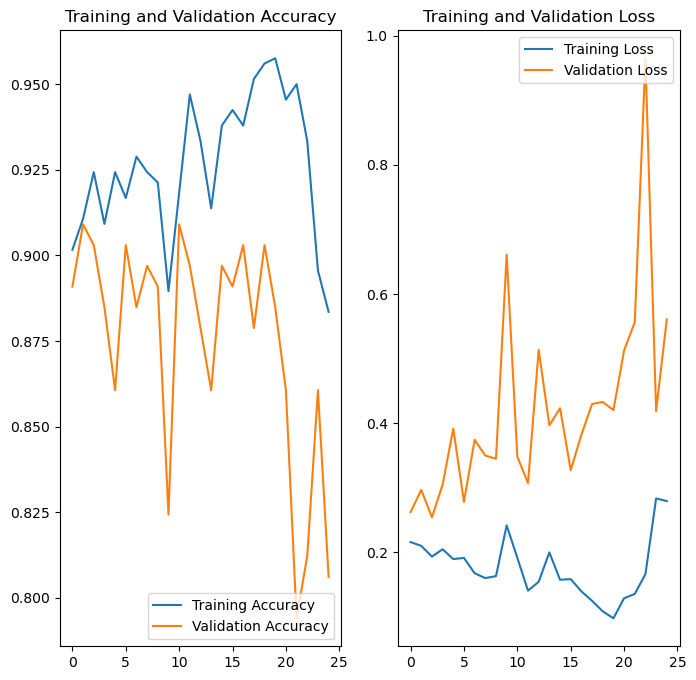

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

Use your model to classify an image that wasn't included in the training or validation sets.

Note: Data augmentation and dropout layers are inactive at inference time.

In [60]:
# sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

drone1_path = "/Users/mantesssa/Projects/nn/nn_tf/How-Long-Can-a-Drone-Stay-in-the-Sky_hero.jpeg"
drone2_path = "/Users/mantesssa/Projects/nn/nn_tf/drone_opener.jpeg"
bird1_path = "/Users/mantesssa/Projects/nn/nn_tf/Egret-to-Sunset.jpeg"

input_img = drone1_path

img = tf.keras.utils.load_img(
    input_img, target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f}% confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# it is work !!!

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to Drones with a 99.53% confidence.


## Use TensorFlow Lite

TensorFlow Lite is a set of tools that enables on-device machine learning by helping developers run their models on mobile, embedded, and edge devices.

### Convert the Keras Sequential model to a TensorFlow Lite model

To use the trained model with on-device applications, first [convert it](https://www.tensorflow.org/lite/models/convert) to a smaller and more efficient model format called a [TensorFlow Lite](https://www.tensorflow.org/lite/) model.

In this example, take the trained Keras Sequential model and use `tf.lite.TFLiteConverter.from_keras_model` to generate a [TensorFlow Lite](https://www.tensorflow.org/lite/) model:

In [65]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/_z/tsmfrc295jx4dgmbsc_4z53w0000gn/T/tmp3fq39m7z/assets


INFO:tensorflow:Assets written to: /var/folders/_z/tsmfrc295jx4dgmbsc_4z53w0000gn/T/tmp3fq39m7z/assets
2023-03-11 15:50:59.445453: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-03-11 15:50:59.445502: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-03-11 15:50:59.450257: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/_z/tsmfrc295jx4dgmbsc_4z53w0000gn/T/tmp3fq39m7z
2023-03-11 15:50:59.472855: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-03-11 15:50:59.472892: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/_z/tsmfrc295jx4dgmbsc_4z53w0000gn/T/tmp3fq39m7z
2023-03-11 15:50:59.556036: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2023-03-11 15:50:59.570816: I tensorflow/cc/saved_model/load

The TensorFlow Lite model you saved in the previous step can contain several function signatures. The Keras model converter API uses the default signature automatically. Learn more about [TensorFlow Lite signatures](https://www.tensorflow.org/lite/guide/signatures).

### Run the TensorFlow Lite model

You can access the TensorFlow Lite saved model signatures in Python via the `tf.lite.Interpreter` class.

Load the model with the `Interpreter`:

In [67]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

Print the signatures from the converted model to obtain the names of the inputs (and outputs):


In [68]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

In this example, you have one default signature called `serving_default`. In addition, the name of the `'inputs'` is `'sequential_1_input'`, while the `'outputs'` are called `'outputs'`. You can look up these first and last Keras layer names when running `Model.summary`, as demonstrated earlier in this tutorial.

Now you can test the loaded TensorFlow Model by performing inference on a sample image with `tf.lite.Interpreter.get_signature_runner` by passing the signature name as follows:

In [69]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

Similar to what you did earlier in the tutorial, you can use the TensorFlow Lite model to classify images that weren't included in the training or validation sets.

You have already tensorized that image and saved it as `img_array`. Now, pass it to the first argument (the name of the `'inputs'`) of the loaded TensorFlow Lite model (`predictions_lite`), compute softmax activations, and then print the prediction for the class with the highest computed probability.

In [70]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

In [71]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to sunflowers with a 94.85 percent confidence.


The prediction generated by the lite model should be almost identical to the predictions generated by the original model:

In [37]:
print(np.max(np.abs(predictions - predictions_lite)))

1.4305115e-06


Of the five classes—`'daisy'`, `'dandelion'`, `'roses'`, `'sunflowers'`, and `'tulips'`—the model should predict the image belongs to sunflowers, which is the same result as before the TensorFlow Lite conversion.


## Next steps

This tutorial showed how to train a model for image classification, test it, convert it to the TensorFlow Lite format for on-device applications (such as an image classification app), and perform inference with the TensorFlow Lite model with the Python API.

You can learn more about TensorFlow Lite through [tutorials](https://www.tensorflow.org/lite/tutorials) and [guides](https://www.tensorflow.org/lite/guide).